In [2]:
import pandas as pd
import numpy as np

In [3]:
import geopandas as gpd

In [4]:
idaho_shp = gpd.read_file(r"C:\Users\ramak\Desktop\Map_generalization_Douglus_peucker\pre_generalized_shapefiles\Idaho.shp")
idaho_shp

,GISJOIN,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
0,G160,4,8,16,01779783,16,ID,Idaho,00,G4000,A,2.140498e+11,2.391723e+09,+44.3484222,-114.5588538,2.959128e+06,2.164415e+11,"POLYGON ((-116.04909 49.00085, -116.04909 49.0..."


<Axes: >

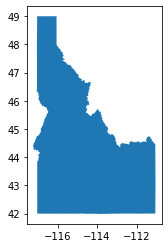

In [5]:
idaho_shp.plot()

In [23]:
import shapely
import matplotlib.pyplot as plt

In [21]:
from shapely.geometry import mapping
from shapely.geometry import Point

In [8]:
total_points = 0

for index,row in idaho_shp.iterrows():
    shape = row['geometry']
   #print(mapping(shape))
    points = mapping(shape)['coordinates']
  # print("number of points:", points)
    total_points += len(points[0])

print("Total points/vertices in idaho shapefile is:", total_points)

Total points/vertices in idaho shapefile is: 35242


In [11]:
print(points)

(((-116.04908600018396, 49.000846000651116), (-116.04908699951282, 49.000670999590845), (-116.04908700018726, 49.00014699998348), (-116.04908700013252, 48.999972999477286), (-116.04908600058174, 48.999934999857885), (-116.04908700046275, 48.99982099978132), (-116.04908700028601, 48.99978300014288), (-116.04909200077287, 48.99749900010223), (-116.04910800011825, 48.99065000027572), (-116.04911400052761, 48.9883669998557), (-116.04911599983171, 48.98771399977367), (-116.04912100051115, 48.985753999929514), (-116.0491230003286, 48.98510200039444), (-116.04912399976418, 48.98420000006438), (-116.0491270001939, 48.98149900037198), (-116.04912899991685, 48.98059800044895), (-116.04912900004038, 48.97903500037131), (-116.04913100054031, 48.974345999413835), (-116.04913200033269, 48.97278399945778), (-116.04912999967627, 48.971658999757196), (-116.04912799988682, 48.96828599976154), (-116.04912700000932, 48.96716200054376), (-116.04912699953077, 48.966945000032474), (-116.04912700060895, 48.96

In [13]:
points_df = pd.DataFrame.from_records(points)
points_dict = points_df.to_dict(orient='list')

print(points_dict)

{0: [(-116.04908600018396, 49.000846000651116)], 1: [(-116.04908699951282, 49.000670999590845)], 2: [(-116.04908700018726, 49.00014699998348)], 3: [(-116.04908700013252, 48.999972999477286)], 4: [(-116.04908600058174, 48.999934999857885)], 5: [(-116.04908700046275, 48.99982099978132)], 6: [(-116.04908700028601, 48.99978300014288)], 7: [(-116.04909200077287, 48.99749900010223)], 8: [(-116.04910800011825, 48.99065000027572)], 9: [(-116.04911400052761, 48.9883669998557)], 10: [(-116.04911599983171, 48.98771399977367)], 11: [(-116.04912100051115, 48.985753999929514)], 12: [(-116.0491230003286, 48.98510200039444)], 13: [(-116.04912399976418, 48.98420000006438)], 14: [(-116.0491270001939, 48.98149900037198)], 15: [(-116.04912899991685, 48.98059800044895)], 16: [(-116.04912900004038, 48.97903500037131)], 17: [(-116.04913100054031, 48.974345999413835)], 18: [(-116.04913200033269, 48.97278399945778)], 19: [(-116.04912999967627, 48.971658999757196)], 20: [(-116.04912799988682, 48.96828599976154)

In [29]:
dict_cord_df = pd.DataFrame(columns=['Latitude', 'Longitude'])

for key in points_dict:
    dict_cord_df.loc[len(dict_cord_df)] = [points_dict[key][0][1], points_dict[key][0][0]]

geometry = [Point(xy) for xy in zip(dict_cord_df['Longitude'], dict_cord_df['Latitude'])]
dict_gdf = gpd.GeoDataFrame(dict_cord_df, geometry=geometry)

print(dict_gdf)

        Latitude   Longitude                     geometry
0      49.000846 -116.049086  POINT (-116.04909 49.00085)
1      49.000671 -116.049087  POINT (-116.04909 49.00067)
2      49.000147 -116.049087  POINT (-116.04909 49.00015)
3      48.999973 -116.049087  POINT (-116.04909 48.99997)
4      48.999935 -116.049086  POINT (-116.04909 48.99993)
...          ...         ...                          ...
35237  49.000893 -116.051729  POINT (-116.05173 49.00089)
35238  49.000911 -116.049418  POINT (-116.04942 49.00091)
35239  49.000897 -116.049350  POINT (-116.04935 49.00090)
35240  49.000858 -116.049153  POINT (-116.04915 49.00086)
35241  49.000846 -116.049086  POINT (-116.04909 49.00085)

[35242 rows x 3 columns]


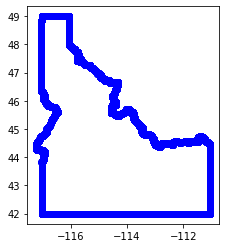

In [30]:
dict_gdf.plot(color='blue')

plt.show()

In [31]:
tuple_cord_df = pd.DataFrame(columns=['Latitude', 'Longitude'])

for coordinate in points[0]:
    tuple_cord_df.loc[len(tuple_cord_df)] = [coordinate[1], coordinate[0]]

geometry = [Point(xy) for xy in zip(tuple_cord_df['Longitude'], tuple_cord_df['Latitude'])]
tuple_gdf = gpd.GeoDataFrame(tuple_cord_df, geometry=geometry)

print(tuple_gdf)

        Latitude   Longitude                     geometry
0      49.000846 -116.049086  POINT (-116.04909 49.00085)
1      49.000671 -116.049087  POINT (-116.04909 49.00067)
2      49.000147 -116.049087  POINT (-116.04909 49.00015)
3      48.999973 -116.049087  POINT (-116.04909 48.99997)
4      48.999935 -116.049086  POINT (-116.04909 48.99993)
...          ...         ...                          ...
35237  49.000893 -116.051729  POINT (-116.05173 49.00089)
35238  49.000911 -116.049418  POINT (-116.04942 49.00091)
35239  49.000897 -116.049350  POINT (-116.04935 49.00090)
35240  49.000858 -116.049153  POINT (-116.04915 49.00086)
35241  49.000846 -116.049086  POINT (-116.04909 49.00085)

[35242 rows x 3 columns]


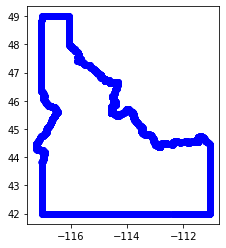

In [35]:
tuple_gdf.plot(color='blue', linewidth=0.05)

plt.show()